# **Estruturas criptográficas 2024-2025**
**Grupo 02**

**Pg55986:** Miguel Ângelo Martins Guimarães 

**Pg55997:** Pedro Miguel Oliveira Carvalho 



# **Exercicio 2**

### **Enunciado do exercicio:**

2. Construir uma classe Python que implemente o EcDSA a partir do “standard” *FIPS186-5*:

    - A implementação deve conter funções para assinar digitalmente e verificar a assinatura.
    - A implementação da classe deve usar  uma das “Twisted Edwards Curves” definidas no standard e escolhida na iniciação da classe: a curva  “edwards25519” ou “edwards448”.



### **Interpretação do enunciado:**
O “standard” *FIPS186-5* especifica o Digital Signature Standard (DSS), que define os algoritmos que são utilizados para implementar assinaturas digitais, incluindo o EdDSA, bem como as curvas elípticas que devem ser utilizadas para a sua implementação.

<div class="alert alert-block alert-info">
<b>Note:</b> Durante a interpretação do enunciado, surgiu uma dúvida em relação ao que é pedido. O exercício solicita a implementação do EcDSA, no entanto, nas alíneas seguintes, é indicado que devem ser utilizadas curvas de Edwards na implementação, o que não é compatível com o ECDSA, já que este normalmente utiliza curvas de Weierstrass.

Assumimos então que a intenção do enunciado era pedir a implementação do EdDSA (Edwards-Curve Digital Signature Algorithm) com base no “standard” *FIPS186-5*.
</div>

### **Analise do FIPS186-5:**

#### **Contexto geral da utilização de assinaturas:**

Um algoritmo de assinatura digital permite garantir a autenticidade, integridade e não repúdio de uma mensagem. Isto significa que é possível verificar que o emissor da mensagem é realmente quem afirma ser (autenticidade), que a mensagem não foi alterada durante a transmissão (integridade), e que o autor da mensagem não pode negar que a enviou (não repúdio).

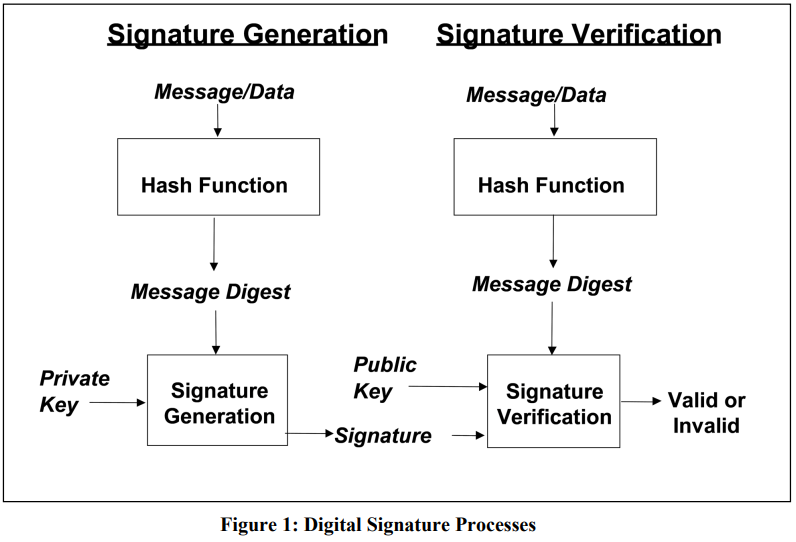

Nesta figura é possível observar o funcionamento das assinaturas digitais.
Durante o processo de geração da assinatura, o emissor utiliza a sua chave privada e a mensagem que pretende enviar para criar uma assinatura digital.

Posteriormente, no processo de verificação da assinatura, o recetor utiliza a chave pública do emissor juntamente com os dados recebidos (mensagem + assinatura) para determinar se a assinatura é válida ou não.

Caso a assinatura seja considerada **inválida**, pode indicar uma das seguintes situações:
- O emissor não é um emissor reconhecido (poderá ter sido utilizada uma chave privada diferente da esperada);
- A integridade da mensagem foi comprometida, ou seja, a mensagem original foi alterada após ter sido assinada pelo emissor.

Deste modo, uma *assinatura digital* válida assegura simultaneamente a *autenticidade* do emissor e a *integridade* da mensagem recebida.

#### **Escolha da curva:**
De acordo com o *FIPS186-5* pode ser utilizada a curva **edwards-25519** ou **edwards-448** para implementar o **edDSA**.

A curva que decidimos escolher na implementação do algoritmo é a curva **ed-25519**,

Após uma leitura do *FIPS186-5* é possivel destacar que os algoritmos de hash utilizados na implementação dos algoritmos de assinatura digital devem utilizar funções de hash aprovadas. Para a implementação do edDSA com a curva **ed-25519** é utilizada a função de hash **SHA-512**.



## **Implementação do edDSA**
### **Criação da curva ed-25519**
Para a utilização/implementação da curva **ed-25519** foram utilizadas as classes implementadas pelo professor que se encontravam disponiveis no ficheiro *"Edwards0.ipynb"* fornecido nos anexos da UC.

O ficheiro contém duas classes, a classe **"Ed"** que permite criar uma instancia de uma curva de edwards permitindo obter um ponto gerador na curva de edwards, verificar se um ponto pertence à curva de edwards, entre outras operações. Esta classe implementa a curva de edwards recorrendo a curva de weiterstrass uma vez que esta já se encontra implementada no sage math por default.

A classe **"ed"** permite criar uma instancia de um ponto da curva de edwards, fornecendo metodos que permitem comparar pontos, duplicar, somar e a parte mais importante: multiplicar o ponto por um escalar. Esta operação de multiplicação de um ponto por um escalar é extremamente imporante pois encontra-se na base de todo o algoritmo de edDSA.


## **Gerar um par de chaves**
A seguir encontra-se descrito como foi implementada a etapa de gerar um par de chaves valido para utilização com o edDSA.  

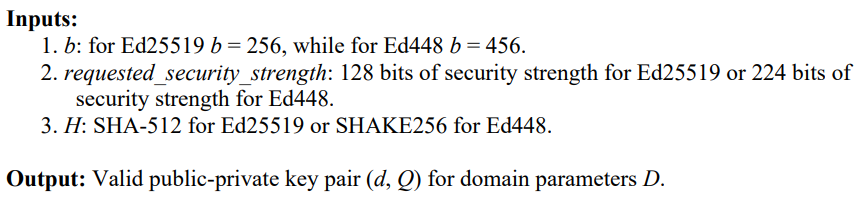

Na figura acima encontram-se os dados de entrada utilizados para a criação da chave privada e da chave publica.

Para a criação da chave privada e publica foram seguidos os passos identificados no *FIPS186-5*.
- **1º Passo**: É necessário obter uma string de b bits proveniente de um gerador de números aleatórios aprovado, que ofereça um nível de segurança compatível com o parâmetro *requested_security_strength*. Como o gerador de *bits* considerado mais robusto é aquele fornecido pelo sistema operacional, conforme mencionado pelo professor, optou-se por utilizar a biblioteca *secrets* do Python, que utiliza as fontes de entropia do próprio sistema para gerar valores aleatórios de forma segura.

Os random bit generators aprovados podem ser verificados no "NIST SP 800-90A Revision 1", onde é possivel verificar que os 3 tipos principais de drbgs aprovados são o hash_drbg, hmac_drbg e ctr_drbg. 